In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [130]:
days = pd.DataFrame(pd.read_csv("day.csv"))
hours = pd.DataFrame(pd.read_csv("hour.csv"))

## Exploratory Data Analysis

In [131]:
days.shape

(731, 16)

In [132]:
hours.shape

(17379, 17)

In [133]:
days.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [134]:
hours.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### statistics of data

In [135]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [136]:
hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### reading few rows of data

In [137]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [138]:
hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



#### Dropping instant,dteday,yr columns.
#### Instant,dteday - primary keys. yr doesn't repeat ( as only two years data(2011,2012) is present.)


In [139]:
days = days.drop(['instant','dteday','yr'], axis=1)
hours = hours.drop(['instant','dteday','yr'], axis=1)
            


##### converting numerical to categorical fields  

In [140]:

days['season'] = days.season.astype('category')
days['mnth'] = days.mnth.astype('category')
days['holiday'] = days.holiday.astype('category')
days['weekday'] = days.weekday.astype('category')
days['workingday'] = days.workingday.astype('category')
days['weathersit'] = days.weathersit.astype('category')

days.dtypes

season        category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [141]:

hours['season'] = hours.season.astype('category')
hours['mnth'] = hours.mnth.astype('category')
hours['hr'] = hours.hr.astype('category')
hours['holiday'] = hours.holiday.astype('category')
hours['weekday'] = hours.weekday.astype('category')
hours['workingday'] = hours.workingday.astype('category')
hours['weathersit'] = hours.weathersit.astype('category')

hours.dtypes

season        category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

### checking for null and zeroes

In [142]:
days.isnull().any()

season        False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [143]:
hours.isnull().any()

season        False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [144]:
days.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [145]:
days_season_mnth = days.groupby(['season','mnth'])['cnt'].sum().reset_index()
days_season_mnth

,season,mnth,cnt
0,1,1,134933
1,1,2,151352
2,1,3,142065
3,1,12,42998
4,2,3,86855
5,2,4,269094
6,2,5,331686
7,2,6,230954
8,3,6,115388
9,3,7,344948


[Text(0.5,1,'count of rentals grouped by month and season')]

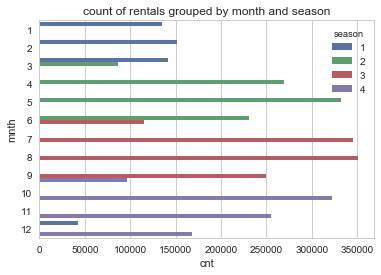

In [146]:
ax = sns.barplot(x="cnt", y="mnth", hue="season", data=days_season_mnth_DF)
ax.set(title="count of rentals grouped by month and season")

#### we can observe the rentals are high during season2(summer) and season3(fall)
#### and the rentals occur mostly on friday and saturday

In [147]:
days.groupby(['weekday'])['cnt'].sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


[Text(0.5,1,'Weekdays rental')]

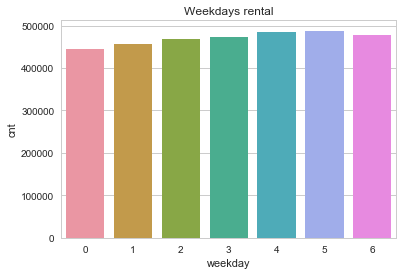

In [148]:
ax = sns.barplot(x="weekday", y="cnt", data=days.groupby(['weekday'])['cnt'].sum().reset_index())
ax.set(title="Weekdays rental")

#### From the counts of rentals with respect to weekdays, slight increase in rentals occur on friday and saturday, probably due to weekend.

In [149]:
hours.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

[Text(0.5,1,'count of rentals grouped by weekday and hr')]

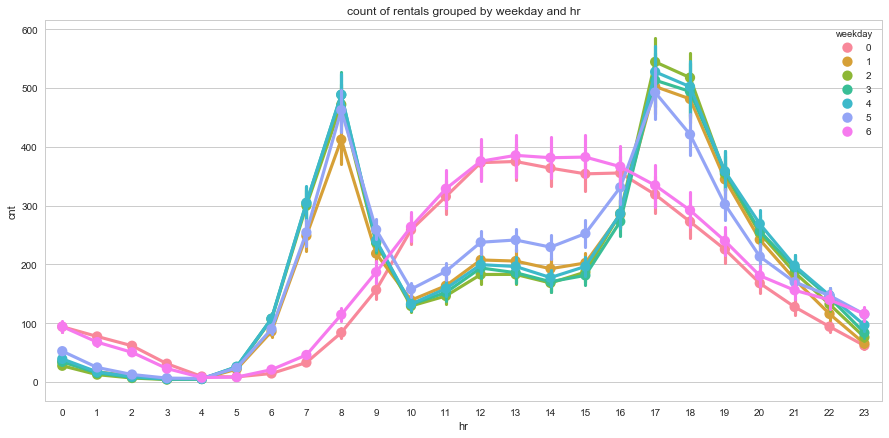

In [150]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.pointplot(data=hours[['hr',
                       'cnt',
                       'weekday']],
            x='hr', y='cnt',
            hue='weekday')
ax.set(title="count of rentals grouped by weekday and hr")

#### On Weekdays , people rent bikes and use them only during morning(7AM to 9AM) and evening(5PM to 7PM)

#### However,on weekends, they rent bikes and use mostly around 10AM to 05PM

 #### As we need to do linear regression for target variable "cnt", there should not exist any multicollinearity. We can remove multicollinearity by removing highly correlated variables or try Principal Component Analysis(PCA). 

In [151]:
days.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


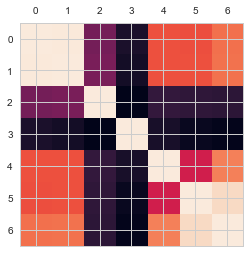

In [152]:
plt.matshow(days.corr())

#### Here, there exists a high correlation between (temp and atemp), (registered and cnt). As registered + casual sum is equal to cnt,, we should remove casual column as well. So, removing, atemp, registered,casual columns and low correlated colums wrt target column cnt (windspeed)  is also removed


In [153]:
days = days.drop(['atemp','registered','casual','windspeed'], axis=1)
days.corr()

,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


In [154]:
hours.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


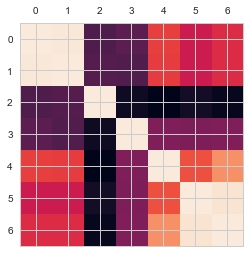

In [155]:
plt.matshow(hours.corr())

#### for hours DF also ,there exists a high correlation between (temp and atemp), (registered and cnt). As registered + casual sum is equal to cnt,, we should remove casual column as well. So, removing, atemp, registered,casual columns and low correlated colums wrt target column cnt (windspeed)  is also removed


In [156]:
hours = hours.drop(['atemp','registered','casual','windspeed'], axis=1)
hours.corr()

,temp,hum,cnt
temp,1.000000,-0.069881,0.404772
hum,-0.069881,1.000000,-0.322911
cnt,0.404772,-0.322911,1.000000


In [157]:
days.describe()

,temp,hum,cnt
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,4504.348837
std,0.183051,0.142429,1937.211452
min,0.059130,0.000000,22.000000
25%,0.337083,0.520000,3152.000000
50%,0.498333,0.626667,4548.000000
75%,0.655417,0.730209,5956.000000
max,0.861667,0.972500,8714.000000


### Plotting normal distribution of days DF column cnt

[Text(0.5,1,'Theoretical quantiles')]

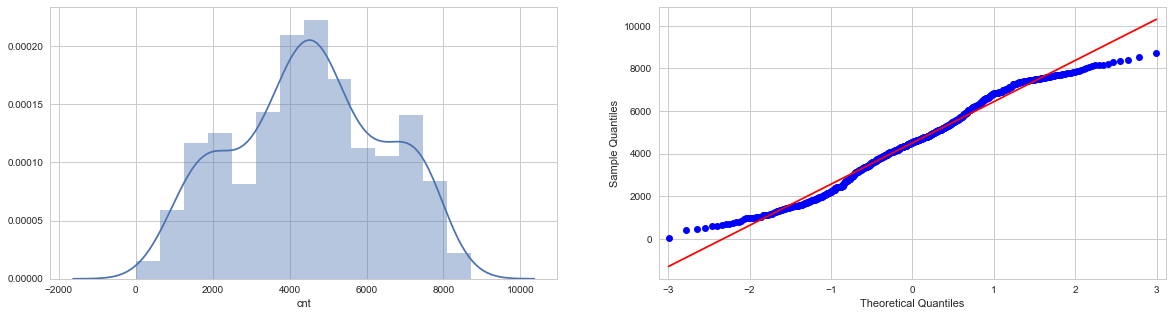

In [158]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(days['cnt'], ax=ax1)
ax.set(title="Distribution before log of count")
qqplot(days['cnt'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

#### As days data seems to be ok, no need of normalization

In [159]:
hours.describe()

,temp,hum,cnt
count,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,189.463088
std,0.192556,0.192930,181.387599
min,0.020000,0.000000,1.000000
25%,0.340000,0.480000,40.000000
50%,0.500000,0.630000,142.000000
75%,0.660000,0.780000,281.000000
max,1.000000,1.000000,977.000000


[Text(0.5,1,'Theoretical quantiles')]

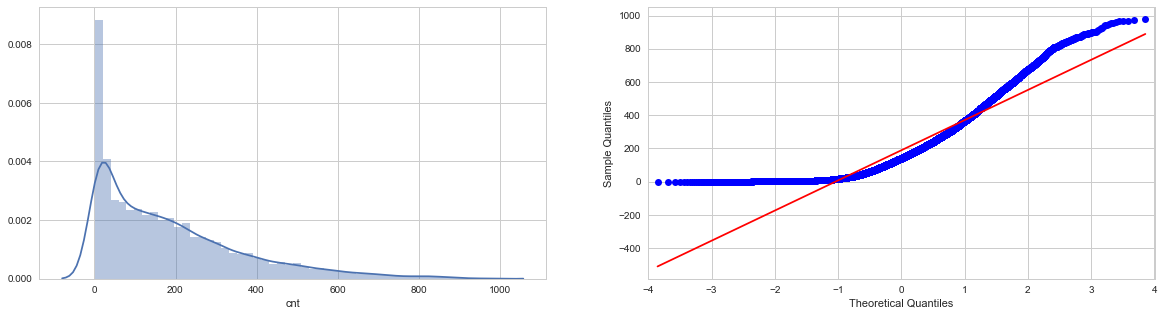

In [160]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(hours['cnt'], ax=ax1)
ax.set(title="Distribution before log of count")
qqplot(hours['cnt'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

#### As hours data is skewed, we need to normalize it

In [161]:
import math
hours['cnt'] = hours['cnt'].transform(lambda x: math.log(x))

[Text(0.5,1,'Theoretical quantiles')]

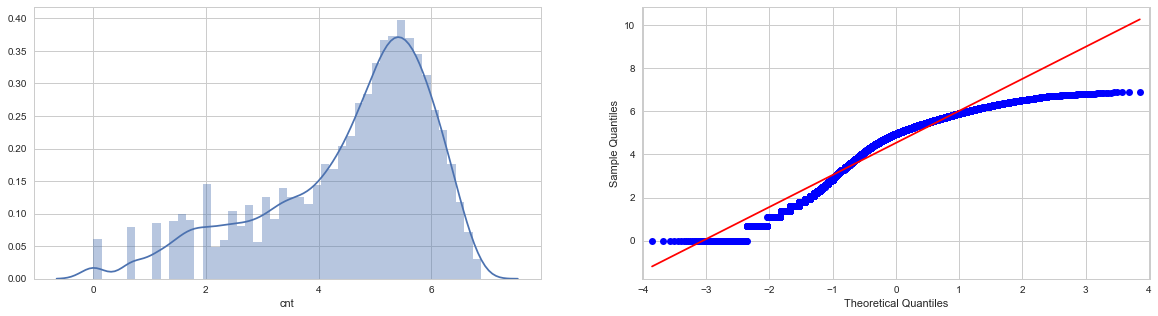

In [162]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(hours['cnt'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(hours['cnt'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [163]:
temp_data = hours

def one_hot_encoding(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

category_columns = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    temp_data = one_hot_encoding(temp_data, column)
    
hours = temp_data

In [164]:
hours.columns

Index(['temp', 'hum', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

### Linear Regression for target Variable "cnt" [for Hours Data Only] 

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [166]:

train_X,test_X,train_Y,test_Y =  train_test_split(hours[['temp','hum','season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4']],hours['cnt'],test_size=0.33,random_state=19)

In [167]:
model_1 = LinearRegression()
model_1.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
pred_1=model_1.predict(test_X)


In [169]:
mse = mean_squared_error(test_Y,pred_1)
mse

0.43238940113091534

In [170]:
rmse = math.pow(mse,0.5)
rmse

0.6575632297588692

### Regression Score (R^2 (coefficient of determination)

In [171]:
r2_value = r2_score(test_Y,pred_1)



In [172]:
r2_value

0.8033210795080342

Text(0,0.5,'count')

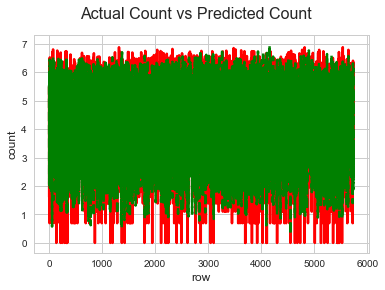

In [173]:
row = [i for i in range(0,test_Y.size)]
fig = plt.figure()
plt.plot(row,test_Y, color="red", linewidth=2.5,)
plt.plot(row,pred_1, color="green",  linewidth=2.5, linestyle="--")
fig.suptitle('Actual Count vs Predicted Count', fontsize=16)
plt.xlabel('row', fontsize=12)                            
plt.ylabel('count', fontsize=12)